### Topic: Correlation between Economics and Real Estate


<ul>
<li>College: Mt San Antonio College</li>
<li>Course: CISD41 Introduction to Data Science</li>
<li>by: Alec Phong and Jack Chen</li>
<br>
<br>


### Overview


<ol>
<li>Questions</li>
<li>Importing Data</li>
<li>Functions and Lambda</li>
<li>Cleaning Data</li>
<li>Organizing Data</li>
<li>Data Visualization</li>
<li>Pivot tables</li>
<li>Descriptive Statistics</li>
<ul><li>Mean, median, standard deviation, precentiles, boxplots</li></ul>
<li>Quantitative Data Exploratory</li>
<ul><li>Correlation, Coefficients, P-values</li></ul>
<li>Testing Hypothesis, ANOVA</li>
<ul><li>Chisquare, ANOVA, Normal-test, Z-test, Pearson Correlation</li></ul>
<li>Summary and Conclusion</li>
<li>References</li>
</ol>

### Questions

### Importing and Reading libraries and data

In [117]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
%matplotlib inline

# filter warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

init_notebook_mode(connected=True)

In [73]:
# Loading Data
df = pd.read_csv('data/data_house.csv')                     # our main data for housing

spending_df = pd.read_csv('data/data_spending.csv')         # need 1 column of spending per state
gdp_df = pd.read_csv('data/data_gdp.csv')                   # need 1 column of gdp per state
population_df = pd.read_csv('data/data_population.csv')     # need 1 column of population per state
income_df = pd.read_csv('data/data_income.csv')             # need 1 column of income per state



In [74]:
df.shape

(85509, 8)

In [75]:
# Reading the housing data
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85509 entries, 0 to 85508
Data columns (total 8 columns):
Price          85509 non-null object
Address        85509 non-null object
Bedrooms       64999 non-null object
Bathrooms      69439 non-null object
Size           73698 non-null object
Sale Status    69960 non-null object
URL            85509 non-null object
Raw Price      85509 non-null float64
dtypes: float64(1), object(7)
memory usage: 5.2+ MB


,Price,Address,Bedrooms,Bathrooms,Size,Sale Status,URL,Raw Price
85504,"$79,000,000","2 Park Pl, New York, NY 10007",NaN,1 ba,"9,680 sqft",Condo for sale,https://www.zillow.com/homedetails/2-Park-Pl-N...,79000000.00
85505,"$90,000,000","432 Park Ave #82, New York, NY 10022",6 bds,8 ba,"8,054 sqft",Condo for sale,https://www.zillow.com/homedetails/432-Park-Av...,90000000.00
85506,"$95,000,000","1441 Angelo Dr, Los Angeles, CA 90210",NaN,NaN,NaN,Lot / Land for sale,https://www.zillow.com/homedetails/1441-Angelo...,95000000.00
85507,"$99,000,000","908 Bel Air Rd, Los Angeles, CA 90077",9 bds,20 ba,"34,000 sqft",House for sale,https://www.zillow.com/homedetails/908-Bel-Air...,99000000.00
85508,"$110,000,000","30 Beverly Park Ter, Beverly Hills, CA 90210",8 bds,12 ba,-- sqft,House for sale,https://www.zillow.com/homedetails/30-Beverly-...,110000000.00


### Functions and Lambda

In [76]:
# drop NaN, Price, URL, and assign to df1
def metric_deletion(x):
    x.dropna(axis='rows',inplace=True)
    x = x[x.Bedrooms != '-- bds']
    x = x[x.Bathrooms != '-- ba']
    x = x[x.Size != '-- sqft']
    x.drop(['URL', 'Price'], axis=1,inplace=True)
    return x
df1 = metric_deletion(df)
df1.head()

,Address,Bedrooms,Bathrooms,Size,Sale Status,Raw Price
5,"3515 W Thompson Rd, Indianapolis, IN 46217",2 bds,1 ba,814 sqft,House for sale,1.00
53,"3713 Hillside Ave, Indianapolis, IN 46218",2 bds,1 ba,"1,728 sqft",House for sale,775.00
65,"1337 W Livingston St APT 1, Allentown, PA 18102",3 bds,1 ba,"1,000 sqft",House for sale,1050.00
70,"1788 Westwood Dr, Troy, MI 48083",3 bds,2 ba,"1,418 sqft",House for sale,1600.00
72,"390 Rosado Springs St, Henderson, NV 89014",2 bds,2 ba,"1,060 sqft",Townhouse for sale,1700.00


In [77]:
# Converting Bathrooms into float
df1.Bathrooms = df1.Bathrooms.str.replace(' ba','').astype('float')
# Converting Bedrooms into float
df1.Bedrooms = df1.Bedrooms.str.replace(' bds','').astype('float')

In [78]:
# Converting Size to float
def filt_size(s):
    s= s.replace(',','')
    s =s.replace(' sqft','')
    return float(s)
df1.Size = df1.Size.apply(filt_size)

In [79]:
# Spliting Address into Street, City, State, ZipCode, and drop the Address
df1.Address = df1.Address.astype('str')
df1['Street']= df1.Address.apply(lambda x: x.split(', ')[0])
df1['City']= df1.Address.apply(lambda x: x.split(', ')[1])
df1['State']= df1.Address.apply(lambda x: (x.split(', ')[-1]).split(' ')[0])
df1['ZipCode']= df1.Address.apply(lambda x: (x.split(', ')[-1]).split(' ')[1])
# Assign to df2
df2 = df1.drop(['Address'],axis=1)
# Reset the index
df2.reset_index(inplace=True,drop=True)
df2.head()


,Bedrooms,Bathrooms,Size,Sale Status,Raw Price,Street,City,State,ZipCode
0,2.00,1.00,814.00,House for sale,1.00,3515 W Thompson Rd,Indianapolis,IN,46217
1,2.00,1.00,1728.00,House for sale,775.00,3713 Hillside Ave,Indianapolis,IN,46218
2,3.00,1.00,1000.00,House for sale,1050.00,1337 W Livingston St APT 1,Allentown,PA,18102
3,3.00,2.00,1418.00,House for sale,1600.00,1788 Westwood Dr,Troy,MI,48083
4,2.00,2.00,1060.00,Townhouse for sale,1700.00,390 Rosado Springs St,Henderson,NV,89014


### Cleaning Data

In [80]:
# Found two rows of abnormal values, so found exact address on google and replace with the right values
df2.loc[28709:28711, 'State']= 'AZ'
df2.loc[28709:28711, 'ZipCode']= '85260'

In [81]:
# Converting the columns as strings for further cleaning
df2[['Street','City','State','ZipCode']].astype('str')

,Street,City,State,ZipCode
0,3515 W Thompson Rd,Indianapolis,IN,46217
1,3713 Hillside Ave,Indianapolis,IN,46218
2,1337 W Livingston St APT 1,Allentown,PA,18102
3,1788 Westwood Dr,Troy,MI,48083
4,390 Rosado Springs St,Henderson,NV,89014
5,11209 Grenada Dr,Sterling Heights,MI,48312
6,65710 Adventure Ct #305A,Bend,OR,97701
7,3970 Garland St,Detroit,MI,48214
8,2127 Merrick St,Detroit,MI,48208
9,14383 Hubbell St,Detroit,MI,48227


In [82]:
# Finding the weird ZipCode, it is in Canada
df2.loc[df2.ZipCode == 'N9V']

,Bedrooms,Bathrooms,Size,Sale Status,Raw Price,Street,City,State,ZipCode
38379,4.00,4.00,2800.00,House for sale,865000.00,349 Benson Ct,Amherstburg,ON,N9V


In [83]:
# Dropping the row
df2.drop(df2.iloc[38379].name,inplace=True)

In [84]:
# Now the ZipCode can be converted to Integer
df2.ZipCode = df2.ZipCode.astype('int')


In [85]:
#convert Sale Status into house Types
house_status = list(df2['Sale Status'].unique())

In [86]:
# Make a list of house types
house_type = ['House','Townhouse','Multifamily', 'Condo', 'Others', 'Apartment']
# Replacing house_status with house_type
df2['Sale Status'] = df2['Sale Status'].map(dict(zip(house_status,house_type)))
df2.rename(columns={"Sale Status": "Type"}, inplace=True)


In [87]:
# Street column is not useful so we drop it
df3 = df2.drop(['Street'], axis=1)

In [88]:
# Change Raw Price column name to Price, create perSqft column
df3.rename(columns={"Raw Price":"Price"}, inplace=True)
df3['perSqFt'] = df3.Price / df3.Size

In [89]:
# Due to previously dropping rows, reset index again
# West Virginia and Wyoming not in data
df3 = df3.reset_index(drop=True)
len(df3.State.unique())


48

In [90]:
# Assign Regions, also need to drop Wyoming and West Virgina since the dataset does not contain 
# listings for that certain State in the initial DataFrame 
west = ['CA', 'NV', 'AK', 'WA' , 'OR', 'ID', 'MT', 'UT', 'CO', 'AZ', 'NM', 'HI']
midwest = ['ND', 'WI','SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'IL', 'IN', 'OH','MI']
north = ['PA', 'NY', 'NH', 'MA', 'CT', 'ME', 'DC', 'NJ', 'RI']
south = ['TX', 'OK', 'AR', 'LA', 'MS', 'AL', 'TN', 'KY', 'VA', 'MD', 'DE', 'NC', 'SC', 'GA', 'FL']
full_state_list = west + midwest + north + south

# Creating function to assign regions
def find_region(state):
    if state in west:
        state = 'West'
    elif state in north:
        state = 'North'
    elif state in south:
        state = 'South'
    elif state in midwest:
        state = 'MidWest'
    return state

# Create Region column
df3['Region'] = df3.State.apply(find_region)

In [91]:
#Display the list of full_state_list in order to compare with the DataFrame state column in order to sort missing , 
full_state_list.sort()
full_state_list
#Converted numpy.Array into a list in order to compare with the list above.
comparator = df3['State'].unique().tolist()
comparator.sort()
comparator
compare_dict = dict(zip(full_state_list,comparator))
compare_dict
# Check our list of states and dataframe states are in sync
# df3 is fully cleaned, now we are making a "state_df"

{'AK': 'AK',
 'AL': 'AL',
 'AR': 'AR',
 'AZ': 'AZ',
 'CA': 'CA',
 'CO': 'CO',
 'CT': 'CT',
 'DC': 'DC',
 'DE': 'DE',
 'FL': 'FL',
 'GA': 'GA',
 'HI': 'HI',
 'IA': 'IA',
 'ID': 'ID',
 'IL': 'IL',
 'IN': 'IN',
 'KS': 'KS',
 'KY': 'KY',
 'LA': 'LA',
 'MA': 'MA',
 'MD': 'MD',
 'ME': 'ME',
 'MI': 'MI',
 'MN': 'MN',
 'MO': 'MO',
 'MS': 'MS',
 'MT': 'MT',
 'NC': 'NC',
 'ND': 'ND',
 'NE': 'NE',
 'NH': 'NH',
 'NJ': 'NJ',
 'NM': 'NM',
 'NV': 'NV',
 'NY': 'NY',
 'OH': 'OH',
 'OK': 'OK',
 'OR': 'OR',
 'PA': 'PA',
 'RI': 'RI',
 'SC': 'SC',
 'SD': 'SD',
 'TN': 'TN',
 'TX': 'TX',
 'UT': 'UT',
 'VA': 'VA',
 'WA': 'WA',
 'WI': 'WI'}

### Organizing Data

In [92]:
# Cleaned house data set to house_df
house_df = df3
house_df

,Bedrooms,Bathrooms,Size,Type,Price,City,State,ZipCode,perSqFt,Region
0,2.00,1.00,814.00,House,1.00,Indianapolis,IN,46217,0.00,MidWest
1,2.00,1.00,1728.00,House,775.00,Indianapolis,IN,46218,0.45,MidWest
2,3.00,1.00,1000.00,House,1050.00,Allentown,PA,18102,1.05,North
3,3.00,2.00,1418.00,House,1600.00,Troy,MI,48083,1.13,MidWest
4,2.00,2.00,1060.00,Townhouse,1700.00,Henderson,NV,89014,1.60,West
5,4.00,2.00,1736.00,House,1700.00,Sterling Heights,MI,48312,0.98,MidWest
6,3.00,4.00,3027.00,House,2000.00,Bend,OR,97701,0.66,West
7,4.00,2.00,2130.00,House,2500.00,Detroit,MI,48214,1.17,MidWest
8,3.00,2.00,1312.00,House,2500.00,Detroit,MI,48208,1.91,MidWest
9,3.00,1.00,936.00,House,2500.00,Detroit,MI,48227,2.67,MidWest


In [93]:
# Read gdp_df
gdp_df.head()

,Unnamed: 0,GeoFips,GeoName,2020
0,0,0,United States,18384687.00
1,1,1000,Alabama,196906.10
2,2,2000,Alaska,50161.00
3,3,4000,Arizona,320550.60
4,4,5000,Arkansas,114943.50


In [94]:
# Checking the States in gdp_df
gdp_df.GeoName.unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'New England', 'Mideast',
       'Great Lakes', 'Plains', 'Southeast', 'Southwest',
       'Rocky Mountain', 'Far West'], dtype=object)

In [95]:
# Drop the non-used States/Regions, converting column names, reset column index
gdp_df = gdp_df[(gdp_df.GeoName != 'United States') & (gdp_df.GeoName != 'Southwest') & (gdp_df.GeoName != 'Southeast') & (gdp_df.GeoName != 'Plains') & (gdp_df.GeoName != 'Mideast') & (gdp_df.GeoName != 'Great Lakes') & (gdp_df.GeoName != 'Rocky Mountain') & (gdp_df.GeoName != 'Far West') & (gdp_df.GeoName != 'District of Columbia') & (gdp_df.GeoName != 'New England') & (gdp_df.GeoName != 'West Virginia') & (gdp_df.GeoName != 'Wyoming')]
gdp_df.rename(columns={'GeoName':'State','2020':'GDP'},inplace=True)
gdp_df = gdp_df[['State', 'GDP']]
gdp_df.reset_index(inplace=True,drop=True)
gdp_df

,State,GDP
0,Alabama,196906.10
1,Alaska,50161.00
2,Arizona,320550.60
3,Arkansas,114943.50
4,California,2663665.90
5,Colorado,346011.30
6,Connecticut,235888.60
7,Delaware,62056.20
8,Florida,944000.80
9,Georgia,536693.00


In [96]:
# Read population_df
population_df.head()

,rank,State,Pop,Growth,Pop2018,Pop2010,growthSince2010,Percent,density
0,1,California,39613493,0.00,39461588,37319502,0.06,0.12,254.29
1,2,Texas,29730311,0.04,28628666,25241971,0.18,0.09,113.81
2,3,Florida,21944577,0.03,21244317,18845537,0.16,0.07,409.22
3,4,New York,19299981,-0.01,19530351,19399878,-0.01,0.06,409.54
4,5,Pennsylvania,12804123,0.00,12800922,12711160,0.01,0.04,286.17


In [97]:
# Checking states in population_df
population_df.State.unique()


array(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania',
       'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan',
       'New Jersey', 'Virginia', 'Washington', 'Arizona', 'Tennessee',
       'Massachusetts', 'Indiana', 'Missouri', 'Maryland', 'Colorado',
       'Wisconsin', 'Minnesota', 'South Carolina', 'Alabama', 'Louisiana',
       'Kentucky', 'Oregon', 'Oklahoma', 'Connecticut', 'Utah',
       'Puerto Rico', 'Nevada', 'Iowa', 'Arkansas', 'Mississippi',
       'Kansas', 'New Mexico', 'Nebraska', 'Idaho', 'West Virginia',
       'Hawaii', 'New Hampshire', 'Maine', 'Montana', 'Rhode Island',
       'Delaware', 'South Dakota', 'North Dakota', 'Alaska',
       'District of Columbia', 'Vermont', 'Wyoming'], dtype=object)

In [98]:
# Filter out some regions and states, Grabbing State and Pop columns, reset index
population_df = population_df[(population_df.State != 'Wyoming') & (population_df.State != 'West Virginia') & (population_df.State != 'District of Columbia') & (population_df.State != 'Puerto Rico')]
population_df = population_df[['State','Pop']]
population_df.sort_values(by=['State'],inplace=True)
population_df.reset_index(inplace=True,drop=True)
population_df


,State,Pop
0,Alabama,4934193
1,Alaska,724357
2,Arizona,7520103
3,Arkansas,3033946
4,California,39613493
5,Colorado,5893634
6,Connecticut,3552821
7,Delaware,990334
8,Florida,21944577
9,Georgia,10830007


In [99]:
income_df.head()

,GeoFips,GeoName,2020
0,0,United States,19607447.00
1,1000,Alabama,228748.80
2,2000,Alaska *,46430.30
3,4000,Arizona,368458.60
4,5000,Arkansas,143147.90


In [100]:
# Check GeoName/States
income_df.GeoName.unique()

array(['United States', 'Alabama', 'Alaska *', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii *', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'New England', 'Mideast',
       'Great Lakes', 'Plains', 'Southeast', 'Southwest',
       'Rocky Mountain', 'Far West'], dtype=object)

In [101]:
# Drop unused States/Region, rename GeoName to State and 2020 to income, filter out other columns, reset index
income_df = income_df[(income_df.GeoName != 'United States') & (income_df.GeoName != 'Southwest') & (income_df.GeoName != 'Southeast') & (income_df.GeoName != 'Plains') & (income_df.GeoName != 'Mideast') & (income_df.GeoName != 'Great Lakes') & (income_df.GeoName != 'Rocky Mountain') & (income_df.GeoName != 'Far West') & (income_df.GeoName != 'District of Columbia') & (income_df.GeoName != 'New England') & (income_df.GeoName != 'West Virginia') & (income_df.GeoName != 'Wyoming')]
income_df.rename(columns={'GeoName':'State','2020':'income'},inplace=True)
income_df = income_df[['State', 'income']]
income_df.reset_index(inplace=True,drop=True)

# we found astrious * in States so we made a function to remove it
def conv_state(a):
    if '*' in a:
        a=a.replace(' *', '')
    return a

# we need to convert to string to run the function
income_df.State.astype('str')
income_df.State = income_df.State.apply(conv_state)
income_df

,State,income
0,Alabama,228748.80
1,Alaska,46430.30
2,Arizona,368458.60
3,Arkansas,143147.90
4,California,2763312.00
5,Colorado,370392.10
6,Connecticut,279612.40
7,Delaware,55357.40
8,Florida,1209995.90
9,Georgia,554566.50


In [61]:
# Reading spending_df
spending_df.head(15)

,Unnamed: 0,GeoFips,GeoName,LineCode,Description,2020
0,0,0,United States,1,Personal consumption expenditures,14047565.0
1,1,0,United States,2,Goods,4653822.0
2,2,0,United States,3,Durable goods,1616408.0
3,3,0,United States,4,Motor vehicles and parts,541265.0
4,4,0,United States,5,Furnishings and durable household equipment,390382.0
5,5,0,United States,6,Recreational goods and vehicles,476217.0
6,6,0,United States,7,Other durable goods,208545.0
7,7,0,United States,8,Nondurable goods,3037413.0
8,8,0,United States,9,Food and beverages purchased for off-pre...,1146676.0
9,9,0,United States,10,Clothing and footwear,362435.0


In [62]:
# Personal consumption expenditure is the total of the sub categories, so we only want the total per state
spending_df = spending_df[spending_df['Description'] == 'Personal consumption expenditures']

# Dropping un-used region/State
spending_df = spending_df[(spending_df.GeoName != 'United States') & (spending_df.GeoName != 'Southwest') & (spending_df.GeoName != 'Southeast') & (spending_df.GeoName != 'Plains') & (spending_df.GeoName != 'Mideast') & (spending_df.GeoName != 'Great Lakes') & (spending_df.GeoName != 'Rocky Mountain') & (spending_df.GeoName != 'Far West') & (spending_df.GeoName != 'District of Columbia') & (spending_df.GeoName != 'New England') & (spending_df.GeoName != 'West Virginia') & (spending_df.GeoName != 'Wyoming')]

# Rename column names
spending_df.rename(columns={'GeoName':'State','2020':'spending'},inplace=True)

# Filter out needed columns
spending_df = spending_df[['State', 'spending']]

# Reset index
spending_df.reset_index(inplace=True,drop=True)
spending_df

,State,spending
0,Alabama,176479.8
1,Alaska,35635.7
2,Arizona,287090.1
3,Arkansas,104488.8
4,California,1835980.6
5,Colorado,270883.0
6,Connecticut,179405.9
7,Delaware,44834.5
8,Florida,947905.9
9,Georgia,408752.8


In [63]:
# Making a merge_df and merge all the data by state
merged_df = gdp_df.merge(spending_df, how = 'inner', on = 'State')
merged_df = merged_df.merge(population_df, how = 'inner', on = 'State')
merged_df = merged_df.merge(income_df, how = 'inner', on = 'State')

# Renaming columns, renaming to fullState is because we will insert abbreviations later, and merge with future data.
merged_df.rename(columns={'State':'fullState','spending':'Spending', 'Pop':'Population', 'income': 'Income'},inplace=True)
merged_df.head()

,fullState,GDP,Spending,Population,Income
0,Alabama,196906.1,176479.8,4934193,228748.8
1,Arizona,320550.6,287090.1,7520103,368458.6
2,Arkansas,114943.5,104488.8,3033946,143147.9
3,California,2663665.9,1835980.6,39613493,2763312.0
4,Colorado,346011.3,270883.0,5893634,370392.1


### Data Visualization

In [64]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.pivot_table(df3, values=['perSqFt'], index=['State'])


,perSqFt
State,
AK,175.69
AL,136.81
AR,142.48
AZ,578.91
CA,498.29
CO,336.63
CT,212.42
DC,574.93
DE,147.46


In [65]:
#created a function that finds states with not enough data to produce analysis
def little_data_states(tab):
    little_info_state = []
    for x in full_state_list:
        if len(tab[tab['State'] == x]) < 30:
            little_info_state.append(x)
    return little_info_state

states_exempted= little_data_states(df3)
        

In [66]:
#created a new dataframe that would filter out these states from the df3 dataframe
df4 = df3[~df3['State'].isin(states_exempted)]
df4

,Bedrooms,Bathrooms,Size,Type,Price,City,State,ZipCode,perSqFt,Region
0,2.00,1.00,814.00,House,1.00,Indianapolis,IN,46217,0.00,MidWest
1,2.00,1.00,1728.00,House,775.00,Indianapolis,IN,46218,0.45,MidWest
2,3.00,1.00,1000.00,House,1050.00,Allentown,PA,18102,1.05,North
3,3.00,2.00,1418.00,House,1600.00,Troy,MI,48083,1.13,MidWest
4,2.00,2.00,1060.00,Townhouse,1700.00,Henderson,NV,89014,1.60,West
5,4.00,2.00,1736.00,House,1700.00,Sterling Heights,MI,48312,0.98,MidWest
6,3.00,4.00,3027.00,House,2000.00,Bend,OR,97701,0.66,West
7,4.00,2.00,2130.00,House,2500.00,Detroit,MI,48214,1.17,MidWest
8,3.00,2.00,1312.00,House,2500.00,Detroit,MI,48208,1.91,MidWest
9,3.00,1.00,936.00,House,2500.00,Detroit,MI,48227,2.67,MidWest


In [ ]:
#updated house_df to DataFrame that filtered out the states with less data
house_df = df4
house_df

In [110]:
#Hawaii, New Hampshire is taken out less than 30 entries
a = df4['State'].unique()
print(sorted(a))

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI']


In [112]:
print(full_state_list)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI']


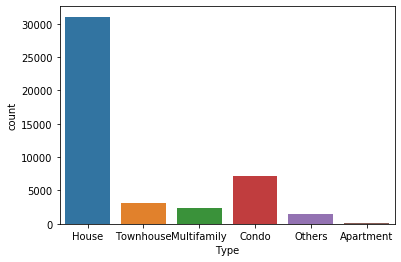

In [103]:
#Created a visualization of overall spread of properties within data (Condo, Townhouse, Home, Multi-Home)
sns.countplot(data = df4, x = 'Type')

In [121]:
len(house_df[house_df['Type'] == 'Apartment'])

189

(0, 10000000)

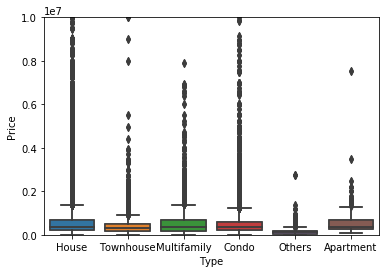

In [122]:
#Created a visulization of average price of properties within data
from matplotlib import figure

sns.boxplot(data = df4, x = 'Type' , y = 'Price')
ax = sns.boxplot(data = df4, x = 'Type' , y = 'Price')
ax.set_ylim(0,10000000)

In [67]:
'''
NOT WORKING CORRECTLY


data = dict(type = 'choropleth',colorscale='Portland',locations=df3['State'],locationmode='USA-states', z=df3['Price'],text=df3['Price'], colorbar={'title':'perSqFt'})
choromap = go.Figure(data = [data],layout = dict(geo = {'scope':'usa'}))

iplot(choromap,validate=False)
'''

"\nNOT WORKING CORRECTLY\n\n\ndata = dict(type = 'choropleth',colorscale='Portland',locations=df3['State'],locationmode='USA-states', z=df3['Price'],text=df3['Price'], colorbar={'title':'perSqFt'})\nchoromap = go.Figure(data = [data],layout = dict(geo = {'scope':'usa'}))\n\niplot(choromap,validate=False)\n"

In [68]:
# for GeoPandas later use
# df2 = df2[df2['ZipCode'].between(10000,99999,inclusive='both')]

### Conclusion

In [69]:
'''



'''

'\n\n\n\n'

### References

In [70]:
'''
References

Data of:    Housing Prices
https://www.kaggle.com/dataranch/zillow-1

Data of:    Population
https://worldpopulationreview.com/states

Data of:    GDP, Income, Spending 
https://apps.bea.gov/iTable/iTable.cfm?reqid=70&step=1&isuri=1&acrdn=1#reqid=70&step=1&isuri=1&acrdn=1


'''

'\nReferences\n\nData of:    Housing Prices\nhttps://www.kaggle.com/dataranch/zillow-1\n\nData of:    Population\nhttps://worldpopulationreview.com/states\n\nData of:    GDP, Income, Spending \nhttps://apps.bea.gov/iTable/iTable.cfm?reqid=70&step=1&isuri=1&acrdn=1#reqid=70&step=1&isuri=1&acrdn=1\n\n\n'